In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8953 - loss: 0.3274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9861 - loss: 0.0453
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9905 - loss: 0.0322
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9919 - loss: 0.0233
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9934 - loss: 0.0190


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(test_images)

print(f"Predicted label: {predictions[0].argmax()}, Actual label: {test_labels[0]}")

313/313 - 1s - 4ms/step - accuracy: 0.9892 - loss: 0.0341
Test accuracy: 0.9892
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted label: 7, Actual label: 7


In [15]:
# 모델 저장
model.save("mnist_cnn.h5")
print("Model saved as mnist_cnn.h5")

# 모델 불러오기
loaded_model = models.load_model("mnist_cnn.h5")
print("Model loaded successfully")

Model saved as mnist_cnn.h5
Model loaded successfully


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9948 - loss: 0.0149 - val_accuracy: 0.9920 - val_loss: 0.0277
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9921 - val_loss: 0.0303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9969 - loss: 0.0090 - val_accuracy: 0.9891 - val_loss: 0.0452
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9924 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9971 - loss: 0.0093 - val_accuracy: 0.9921 - val_loss: 0.0312


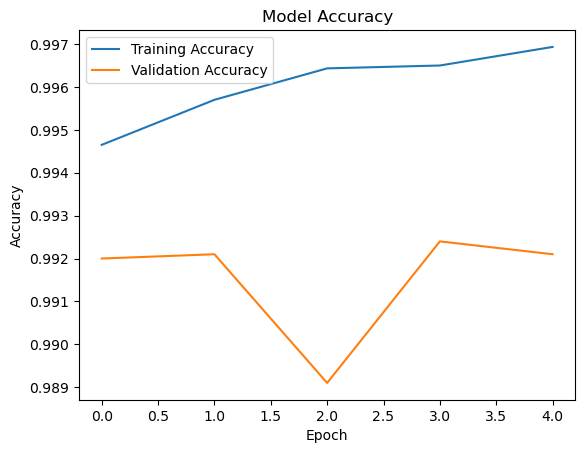

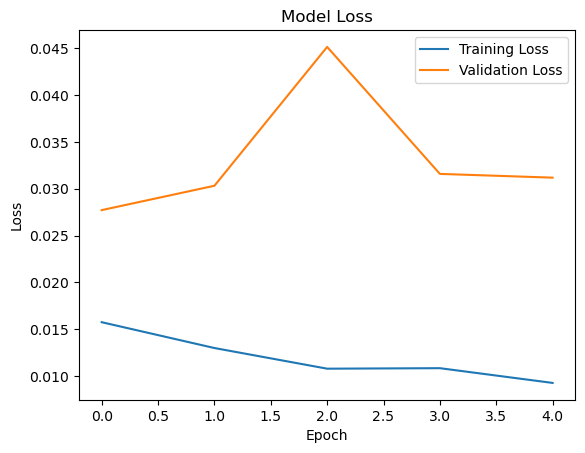

In [17]:
import matplotlib.pyplot as plt

# 학습 과정 시각화
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# 정확도 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import numpy as np

def predict_single_image(image):
    # 이미지 전처리
    image = image.reshape((1, 28, 28, 1)) / 255.0
    prediction = loaded_model.predict(image)
    predicted_label = np.argmax(prediction)
    print(f"Predicted Label: {predicted_label}")
    return predicted_label

# 예시: 테스트 데이터 첫 번째 이미지 예측
predict_single_image(test_images[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Label: 1


1

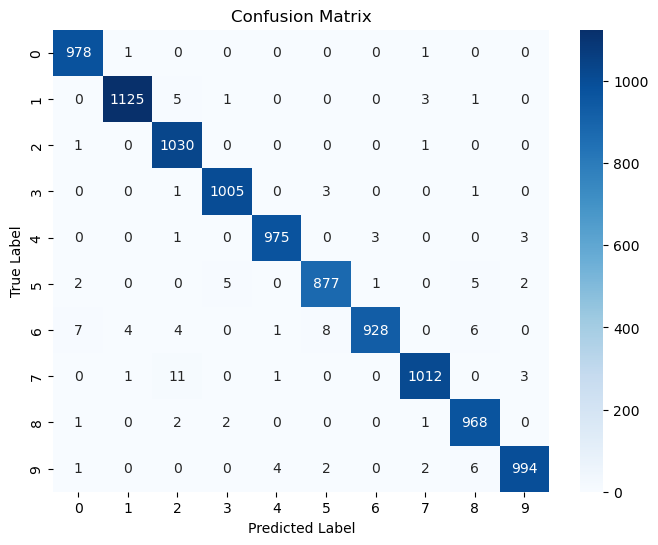

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = np.argmax(predictions, axis=1)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(test_labels, y_pred)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


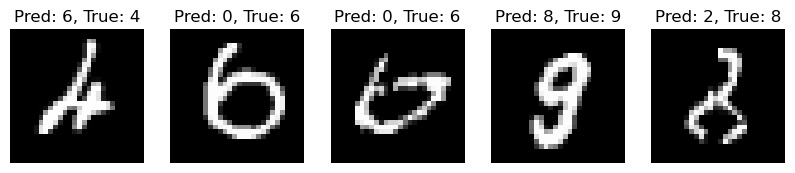

In [23]:
# 잘못 예측한 인덱스 추출
incorrect = np.where(y_pred != test_labels)[0]

# 잘못 예측한 이미지 시각화
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred[idx]}, True: {test_labels[idx]}")
    plt.axis("off")
plt.show()
